In [39]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_results(solver, J, K, p, data_dir="../data"):
    """
    Read the CSV for given parameters and compute:
    1. Average runtime across all simulations.
    2. Average runtime for simulations where branch == 6.
    3. Proportion of simulations that are identifiable.
    4. Plot the distribution of the 'branch' variable.
    
    Handles mixed-type 'identifiable' values and prints summary to console.
    """
    filename = f"{data_dir}/solver{solver}_J{J}_K{K}_p{p}.csv"
    df = pd.read_csv(filename)
    
    def tf_to_int(x):
        if isinstance(x, str):
            v = x.strip().lower()
            if v == 'true':
                return 1
            elif v == 'false':
                return 0
        return x  # leave ints (and anything else) as-is

    df['identifiable'] = df['identifiable'].apply(tf_to_int)

    # 1. Average runtime
    avg_runtime = df['runtime'].mean()
    
    # 2. Average runtime for branch == 6
    branch5 = df[df['branch'] == 5]
    avg_runtime_branch5 = branch5['runtime'].mean() if not branch5.empty else float('nan')
    branch6 = df[df['branch'] == 6]
    avg_runtime_branch6 = branch6['runtime'].mean() if not branch6.empty else float('nan')

    SAT = df[df['branch'].isin([5, 6])]
    avg_runtime_SAT = SAT['runtime'].mean() if not SAT.empty else float('nan')
    
    
    # 3. Proportion identifiable
    prop_identifiable = df['identifiable'].mean()
    
    # Print summary
    summary = pd.DataFrame({
        'Metric': [
            'Average runtime (all sims)',
            'avg_runtime_SAT',
            'avg_runtime_branch5',
            'avg_runtime_branch6',
            'Proportion identifiable'
        ],
        'Value': [
            avg_runtime,
            avg_runtime_SAT,
            avg_runtime_branch5,
            avg_runtime_branch6,
            prop_identifiable
        ]
    })
    print("\nSummary Statistics:")
    print(summary.to_string(index=False))
    
    # 4. Plot distribution of branch
    counts = df['branch'].value_counts().sort_index()
    plt.figure(figsize=(8, 4))
    counts.plot(kind='bar')
    plt.xlabel('Branch value')
    plt.ylabel('Count')
    plt.title(f'Distribution of branch for solver={solver}, J={J}, K={K}, p={p}')
    plt.tight_layout()
    plt.show()
    
    return avg_runtime, avg_runtime_SAT, avg_runtime_branch5, avg_runtime_branch6, prop_identifiable


# 

In [17]:
def multiple_results(solver, J, K, p_list):
    results = {
        'p': [],
        'avg_runtime_all': [],
        'prop_identifiable': []
    }
    
    for p in p_list:
        avg_all, _, _, _, prop_id = analyze_results(solver, J, K, p)
        results['p'].append(p)
        results['avg_runtime_all'].append(avg_all)
        results['prop_identifiable'].append(prop_id)
    
    df = pd.DataFrame(results)
    return df

In [38]:
df = pd.read_csv("solver1_J25_K5_p0.5.csv")
df['identifiable'].mean()

0.9824561403508771

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_simulation_results_hist(solver, J, K, p_list):
    # Gather results
    results = {
        'p': [],
        'avg_runtime_all': [],
        'prop_identifiable': []
    }
    
    for p in p_list:
        avg_all, _, _, _, prop_id = analyze_results(solver, J, K, p)
        results['p'].append(p)
        results['avg_runtime_all'].append(avg_all)
        results['prop_identifiable'].append(prop_id)
    
    df = pd.DataFrame(results)

    # Figure 1: Proportion identifiable as a bar chart
    plt.figure(figsize=(4, 3), dpi=300)
    bar_width = 0.1
    plt.bar(df['p'], df['prop_identifiable'], width=bar_width, align='center')
    plt.xticks(p_list)                    # show only 0.3, 0.5, 0.7
    plt.xlabel('p')
    plt.ylabel('Proportion identifiable')
    plt.title('Identifiability vs. p')
    # dynamic upper bound: max + 5%
    y_max = df['prop_identifiable'].max() * 1.05
    plt.ylim(0, y_max)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.savefig(f'identifiability_with_p_J{J}_K{K}.pdf', bbox_inches='tight')
    plt.close()

    # Figure 2: Average runtime as a bar chart
    plt.figure(figsize=(4, 3), dpi=300)
    plt.bar(df['p'], df['avg_runtime_all'], width=bar_width, align='center', color='C1')
    plt.xticks(p_list)
    plt.xlabel('p')
    plt.ylabel('Average runtime (s)')
    plt.title('Average Runtime vs. p')
    rt_max = df['avg_runtime_all'].max() * 1.05
    plt.ylim(0, rt_max)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.savefig(f'runtime_vs_p_J{J}_K{K}.pdf', bbox_inches='tight')
    plt.close()

    print("Plots saved: identifiability_with_p.pdf, runtime_vs_p.pdf")



Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.000879
           avg_runtime_SAT 0.004216
       avg_runtime_branch5      NaN
       avg_runtime_branch6 0.004216
   Proportion identifiable 1.000000


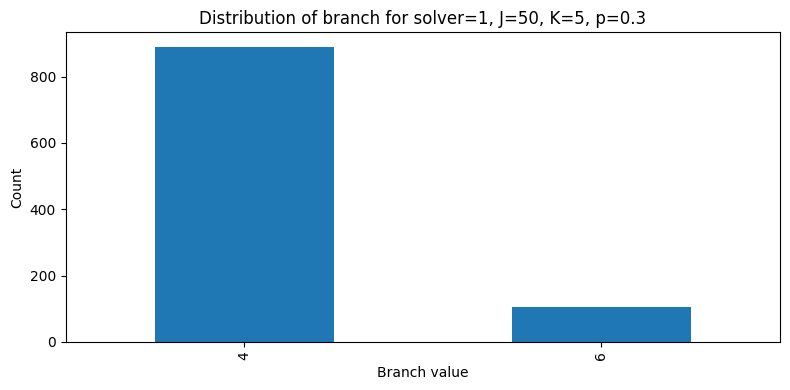


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.003097
           avg_runtime_SAT 0.004197
       avg_runtime_branch5      NaN
       avg_runtime_branch6 0.004197
   Proportion identifiable 1.000000


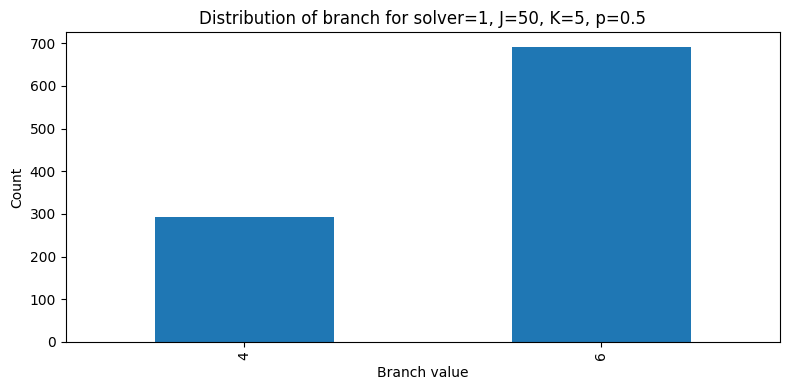


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.004313
           avg_runtime_SAT 0.004313
       avg_runtime_branch5 0.003948
       avg_runtime_branch6 0.004314
   Proportion identifiable 0.997957


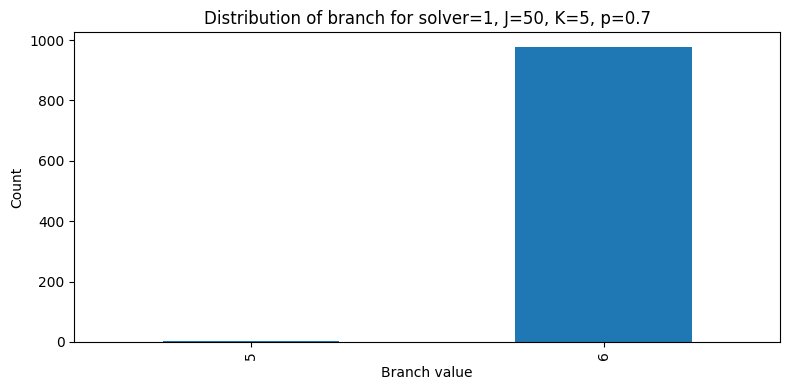

Plots saved: identifiability_with_p.pdf, runtime_vs_p.pdf


In [48]:
solver = 1
J, K = 50, 5
p_list = [0.3, 0.5, 0.7]
plot_simulation_results_hist(solver, J, K, p_list)


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.384422
           avg_runtime_SAT 0.384808
       avg_runtime_branch5      NaN
       avg_runtime_branch6 0.384808
   Proportion identifiable 0.998985


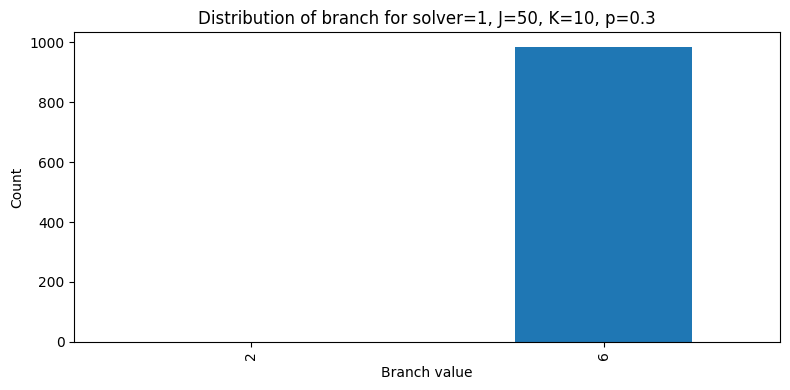


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.319443
           avg_runtime_SAT 0.319443
       avg_runtime_branch5      NaN
       avg_runtime_branch6 0.319443
   Proportion identifiable 1.000000


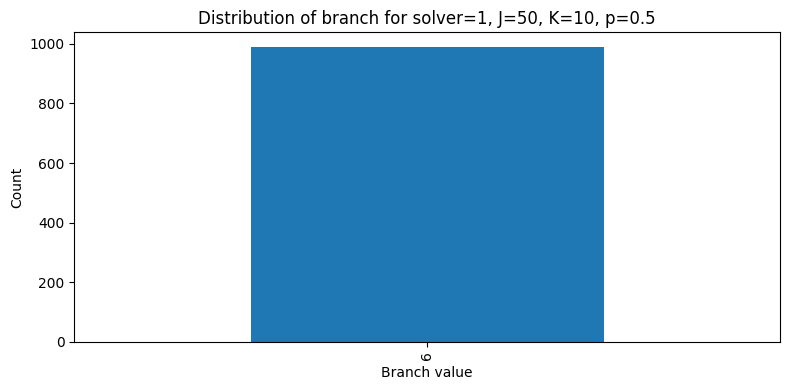


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 3.420471
           avg_runtime_SAT 3.448132
       avg_runtime_branch5 1.711162
       avg_runtime_branch6 3.572471
   Proportion identifiable 0.925703


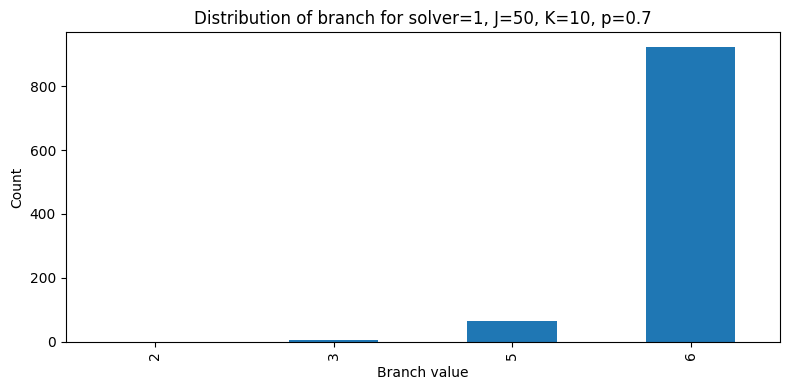

Plots saved: identifiability_with_p.pdf, runtime_vs_p.pdf


In [49]:
solver = 1
J, K = 50, 10
p_list = [0.3, 0.5, 0.7]
plot_simulation_results_hist(solver, J, K, p_list)


Summary Statistics:
                    Metric     Value
Average runtime (all sims) 13.329163
           avg_runtime_SAT 13.342374
       avg_runtime_branch5       NaN
       avg_runtime_branch6 13.342374
   Proportion identifiable  0.999000


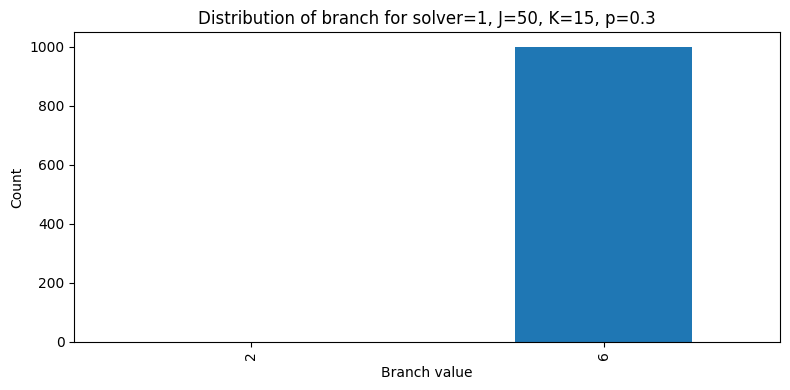


Summary Statistics:
                    Metric      Value
Average runtime (all sims) 397.561176
           avg_runtime_SAT 397.561176
       avg_runtime_branch5        NaN
       avg_runtime_branch6 397.561176
   Proportion identifiable   1.000000


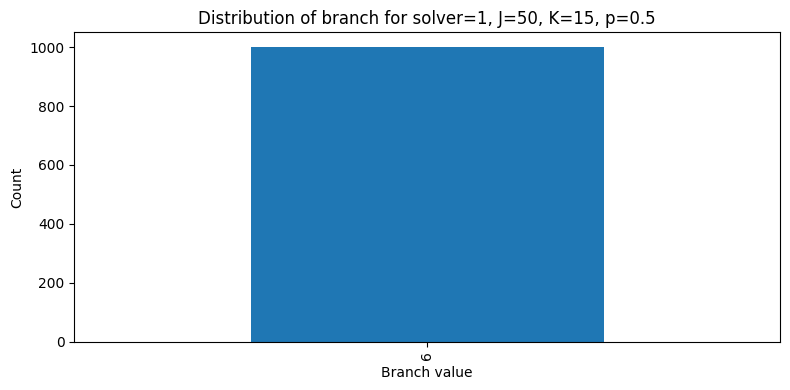


Summary Statistics:
                    Metric        Value
Average runtime (all sims) 11952.461122
           avg_runtime_SAT 12206.768525
       avg_runtime_branch5  5039.060370
       avg_runtime_branch6 89259.631184
   Proportion identifiable     0.083333


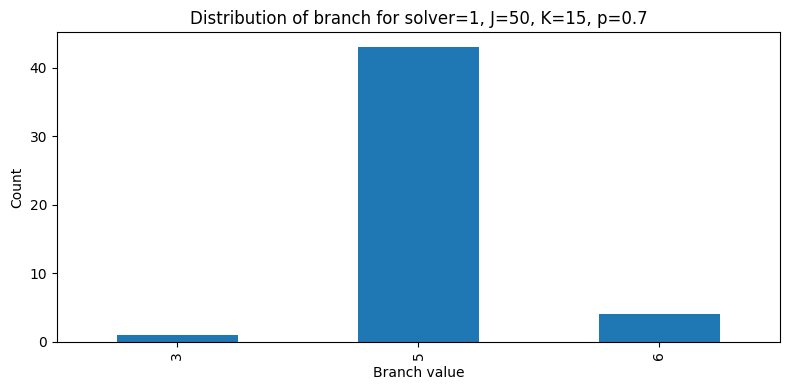

Plots saved: identifiability_with_p.pdf, runtime_vs_p.pdf


In [50]:
solver = 1
J, K = 50, 15
p_list = [0.3, 0.5, 0.7]
plot_simulation_results_hist(solver, J, K, p_list)


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.002088
           avg_runtime_SAT 0.003392
       avg_runtime_branch5      NaN
       avg_runtime_branch6 0.003392
   Proportion identifiable 0.952133


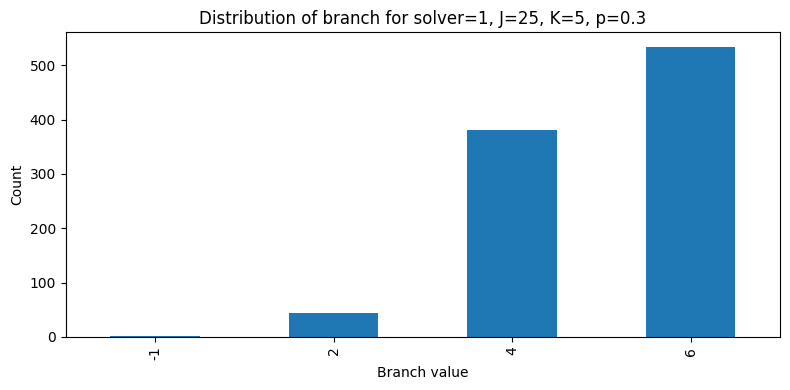


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.003552
           avg_runtime_SAT 0.003707
       avg_runtime_branch5      NaN
       avg_runtime_branch6 0.003707
   Proportion identifiable 0.000000


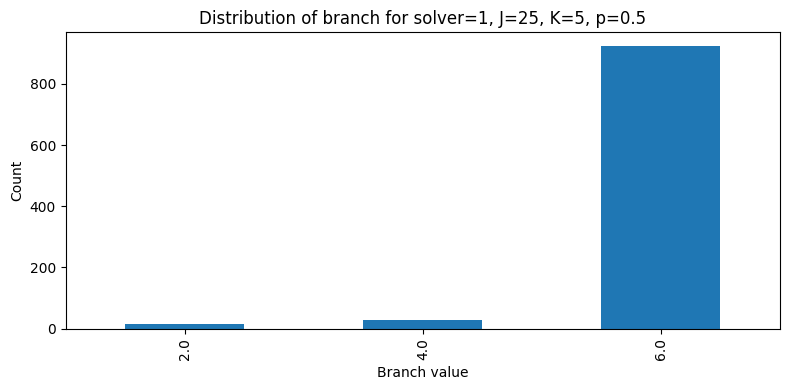


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.003071
           avg_runtime_SAT 0.003329
       avg_runtime_branch5 0.003146
       avg_runtime_branch6 0.003352
   Proportion identifiable 0.803279


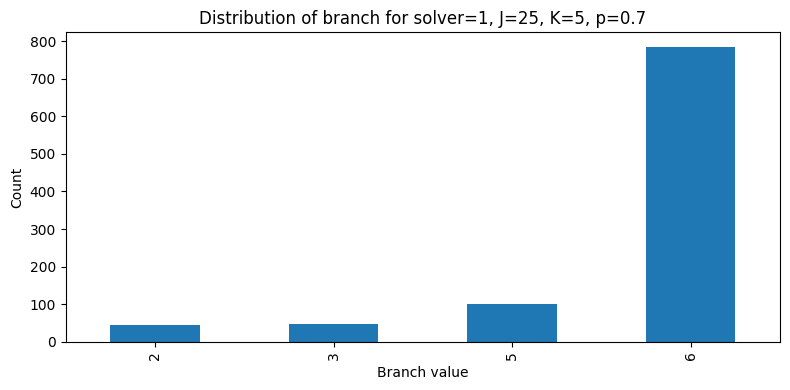

Plots saved: identifiability_with_p.pdf, runtime_vs_p.pdf


In [6]:
solver = 1
J, K = 25, 5
p_list = [0.3, 0.5, 0.7]
plot_simulation_results_hist(solver, J, K, p_list)


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.125884
           avg_runtime_SAT 0.152387
       avg_runtime_branch5      NaN
       avg_runtime_branch6 0.152387
   Proportion identifiable 0.822289


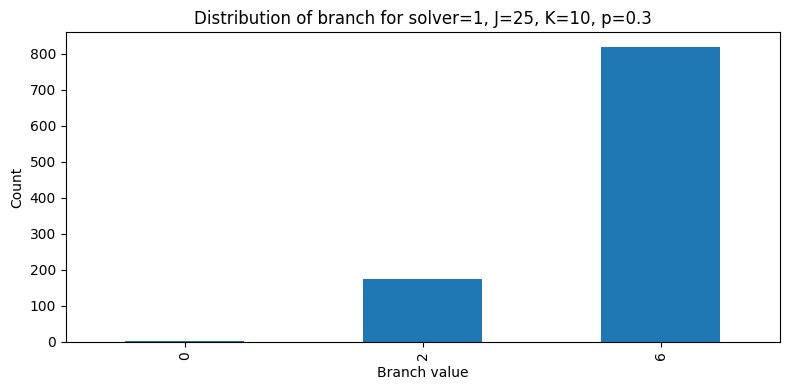


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.143212
           avg_runtime_SAT 0.152046
       avg_runtime_branch5 0.095846
       avg_runtime_branch6 0.152529
   Proportion identifiable 0.932866


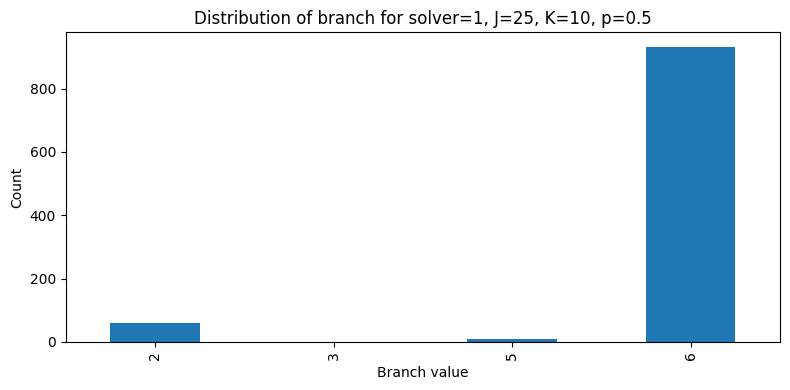


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.435777
           avg_runtime_SAT 0.807185
       avg_runtime_branch5 0.323901
       avg_runtime_branch6 5.412599
   Proportion identifiable 0.000000


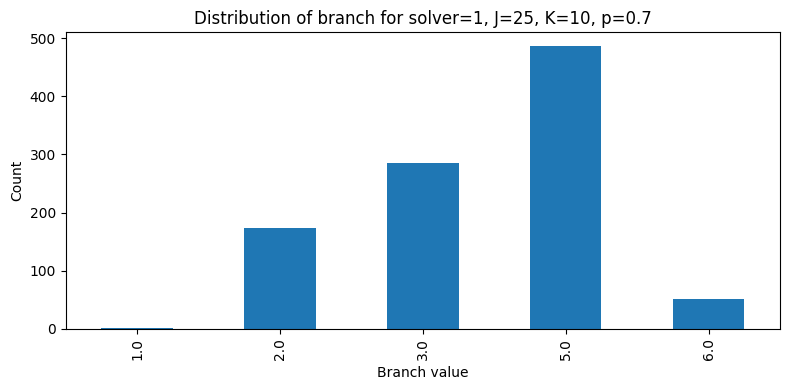

Plots saved: identifiability_with_p.pdf, runtime_vs_p.pdf


In [7]:
solver = 1
J, K = 25, 10
p_list = [0.3, 0.5, 0.7]
plot_simulation_results_hist(solver, J, K, p_list)


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 1.921363
           avg_runtime_SAT 2.793691
       avg_runtime_branch5      NaN
       avg_runtime_branch6 2.793691
   Proportion identifiable 0.685686


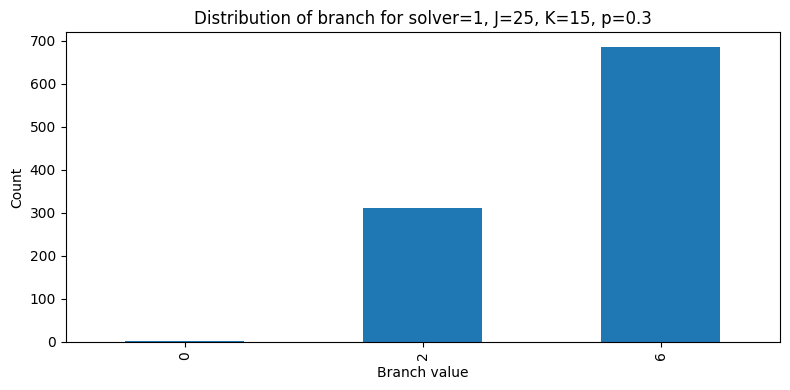


Summary Statistics:
                    Metric       Value
Average runtime (all sims) 1283.889216
           avg_runtime_SAT 1494.062021
       avg_runtime_branch5   48.143167
       avg_runtime_branch6 1549.263357
   Proportion identifiable    0.827727


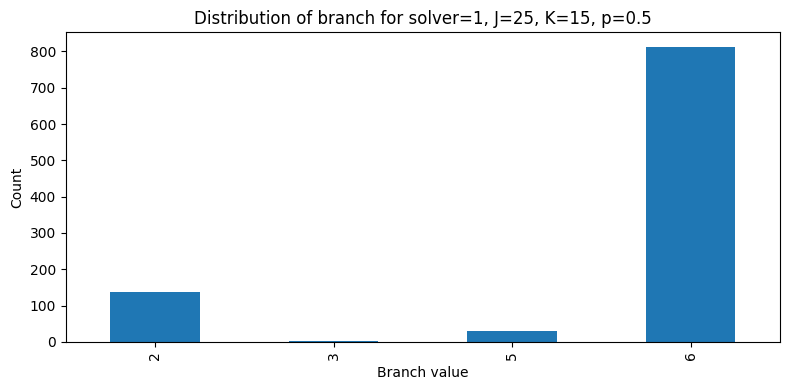


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.336911
           avg_runtime_SAT 1.747984
       avg_runtime_branch5 1.747984
       avg_runtime_branch6      NaN
   Proportion identifiable 0.000000


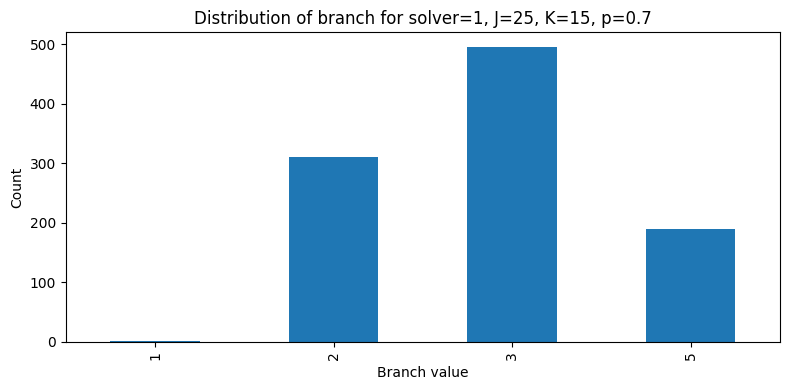

Plots saved: identifiability_with_p.pdf, runtime_vs_p.pdf


In [8]:
solver = 1
J, K = 25, 15
p_list = [0.3, 0.5, 0.7]
plot_simulation_results_hist(solver, J, K, p_list)


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.000715
           avg_runtime_SAT 0.003314
       avg_runtime_branch5      NaN
       avg_runtime_branch6 0.003314
   Proportion identifiable 0.443102


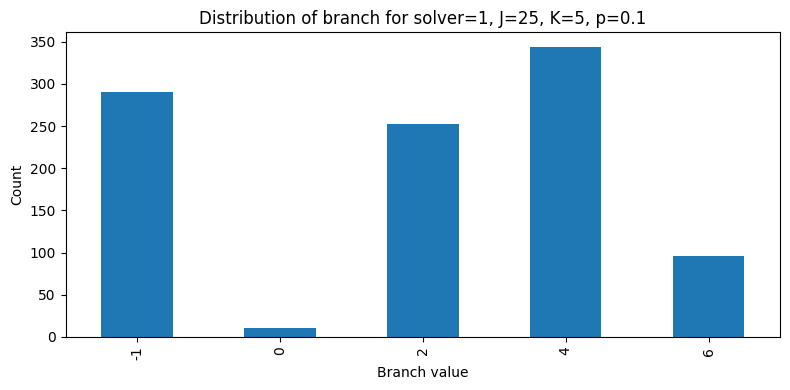


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.002088
           avg_runtime_SAT 0.003392
       avg_runtime_branch5      NaN
       avg_runtime_branch6 0.003392
   Proportion identifiable 0.952133


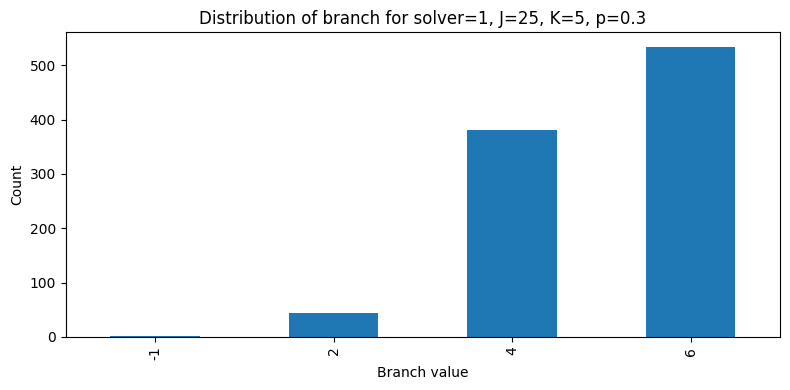


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.003552
           avg_runtime_SAT 0.003707
       avg_runtime_branch5      NaN
       avg_runtime_branch6 0.003707
   Proportion identifiable 0.982456


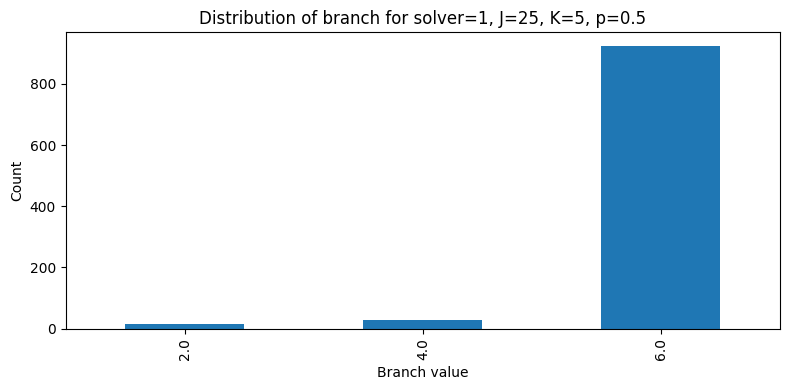


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.003071
           avg_runtime_SAT 0.003329
       avg_runtime_branch5 0.003146
       avg_runtime_branch6 0.003352
   Proportion identifiable 0.803279


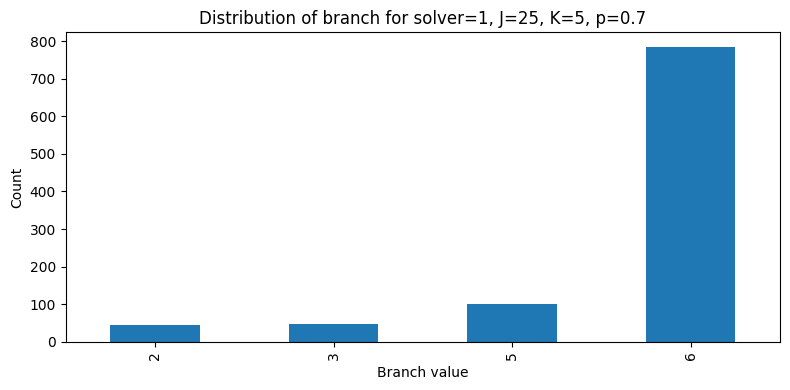


Summary Statistics:
                    Metric   Value
Average runtime (all sims) 0.00057
           avg_runtime_SAT 0.00313
       avg_runtime_branch5 0.00313
       avg_runtime_branch6     NaN
   Proportion identifiable 0.00000


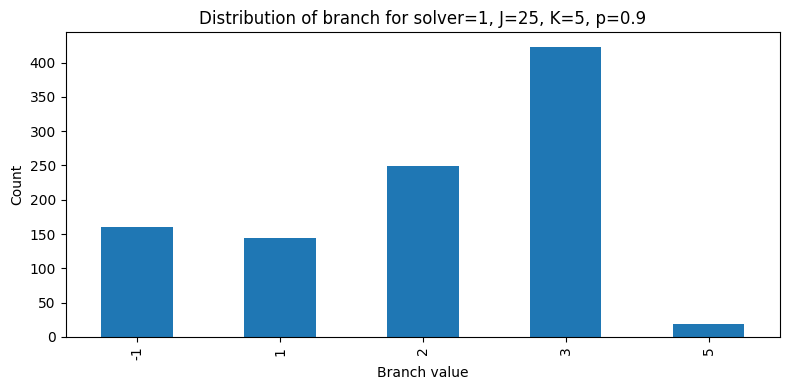

In [41]:
solver = 1
J, K = 25, 5
p_list = [0.1, 0.3, 0.5, 0.7, 0.9]
J25K5 = multiple_results(solver, J, K, p_list)

In [42]:
J25K5

,p,avg_runtime_all,prop_identifiable
0,0.1,0.000715,0.443102
1,0.3,0.002088,0.952133
2,0.5,0.003552,0.982456
3,0.7,0.003071,0.803279
4,0.9,0.000570,0.000000



Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.010802
           avg_runtime_SAT 0.135607
       avg_runtime_branch5      NaN
       avg_runtime_branch6 0.135607
   Proportion identifiable 0.075681


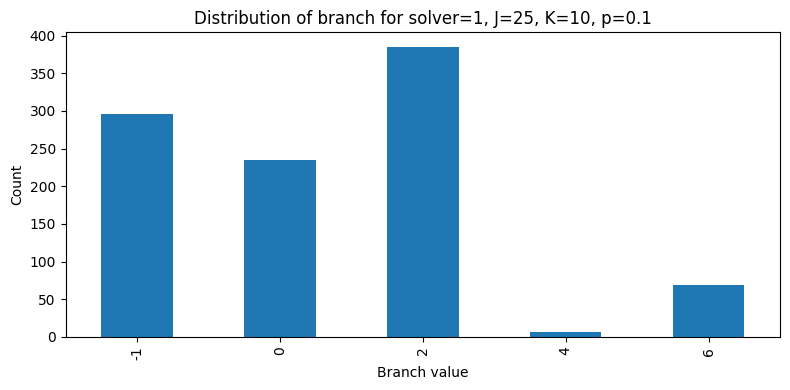


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.125884
           avg_runtime_SAT 0.152387
       avg_runtime_branch5      NaN
       avg_runtime_branch6 0.152387
   Proportion identifiable 0.822289


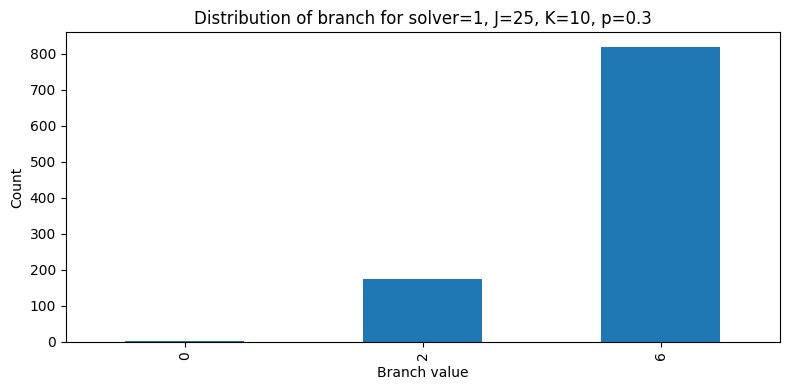


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.143212
           avg_runtime_SAT 0.152046
       avg_runtime_branch5 0.095846
       avg_runtime_branch6 0.152529
   Proportion identifiable 0.932866


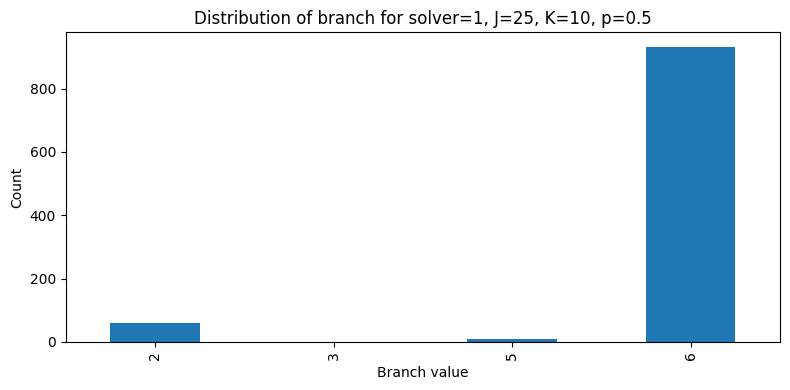


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.435777
           avg_runtime_SAT 0.807185
       avg_runtime_branch5 0.323901
       avg_runtime_branch6 5.412599
   Proportion identifiable 0.051153


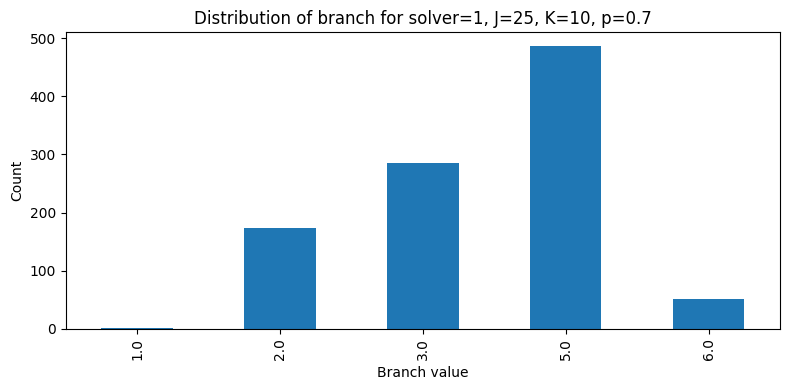


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.000851
           avg_runtime_SAT      NaN
       avg_runtime_branch5      NaN
       avg_runtime_branch6      NaN
   Proportion identifiable 0.000000


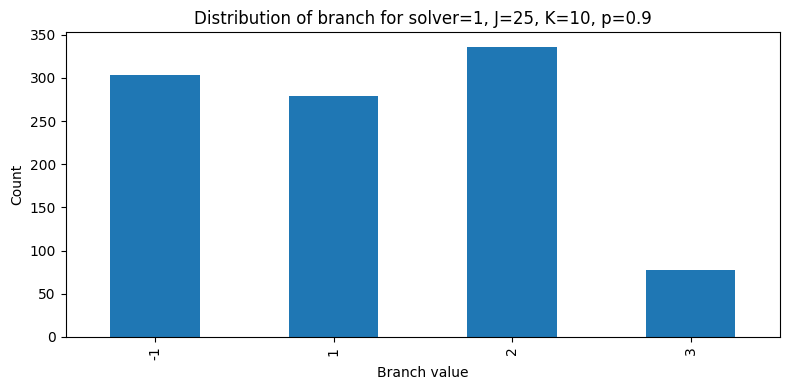

In [43]:
solver = 1
J, K = 25, 10
p_list = [0.1, 0.3, 0.5, 0.7, 0.9]
J25K10 = multiple_results(solver, J, K, p_list)


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.044216
           avg_runtime_SAT 3.489099
       avg_runtime_branch5      NaN
       avg_runtime_branch6 3.489099
   Proportion identifiable 0.009307


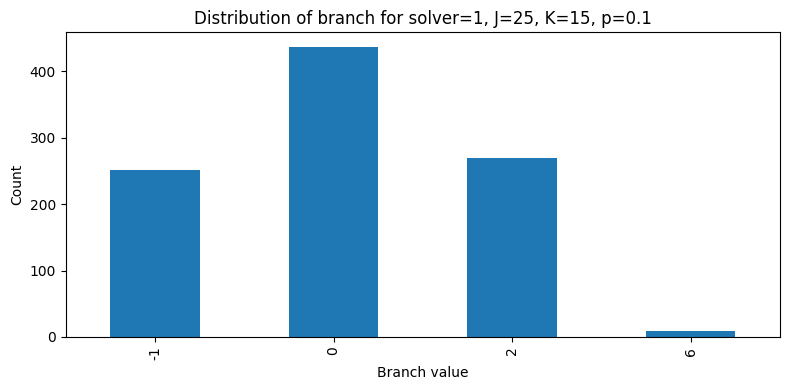


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 1.921363
           avg_runtime_SAT 2.793691
       avg_runtime_branch5      NaN
       avg_runtime_branch6 2.793691
   Proportion identifiable 0.685686


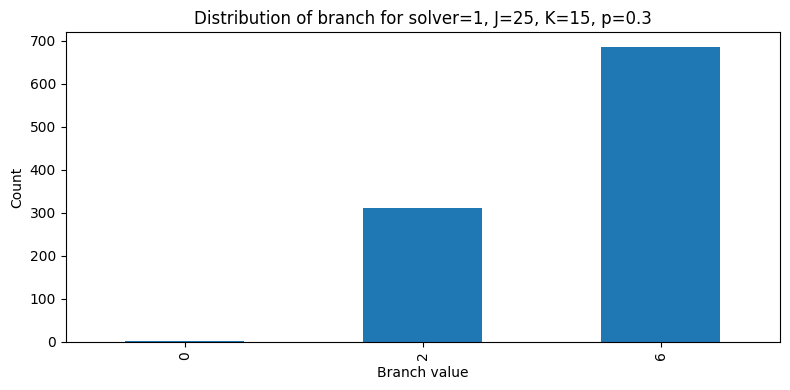


Summary Statistics:
                    Metric       Value
Average runtime (all sims) 1283.889216
           avg_runtime_SAT 1494.062021
       avg_runtime_branch5   48.143167
       avg_runtime_branch6 1549.263357
   Proportion identifiable    0.827727


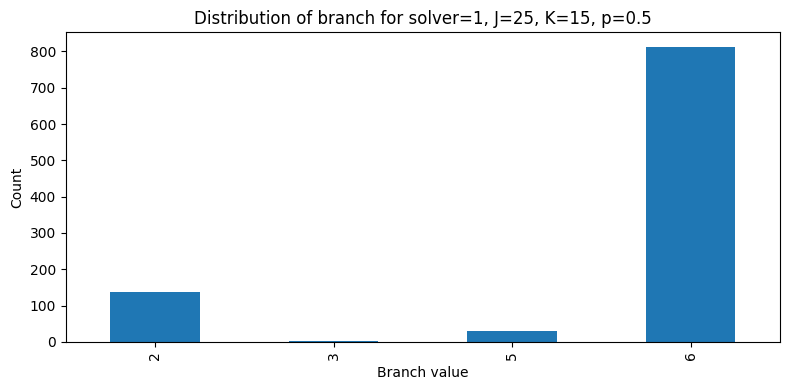


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.336911
           avg_runtime_SAT 1.747984
       avg_runtime_branch5 1.747984
       avg_runtime_branch6      NaN
   Proportion identifiable 0.000000


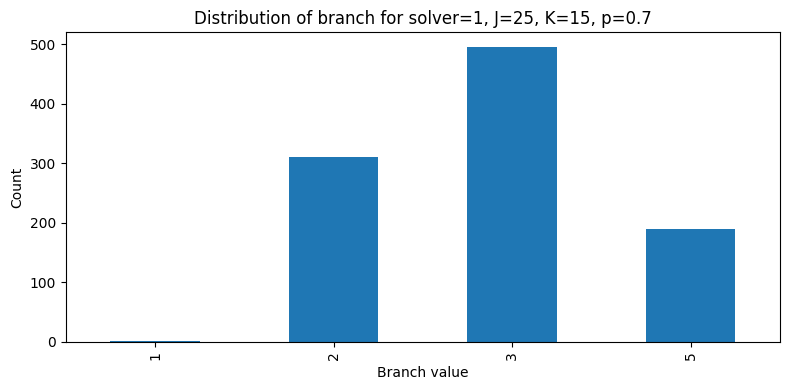


Summary Statistics:
                    Metric    Value
Average runtime (all sims) 0.001195
           avg_runtime_SAT      NaN
       avg_runtime_branch5      NaN
       avg_runtime_branch6      NaN
   Proportion identifiable 0.000000


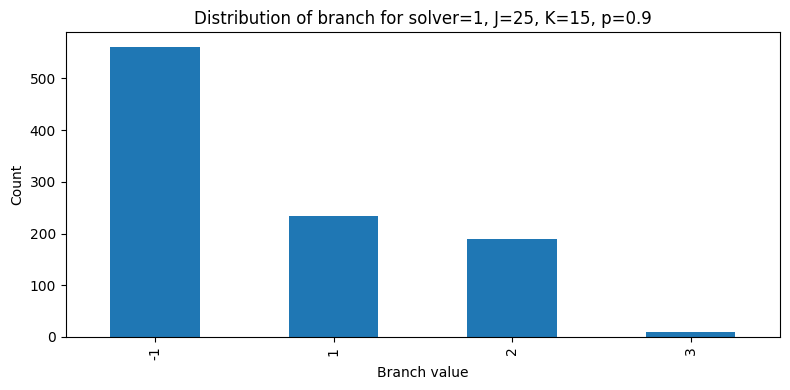

In [44]:
solver = 1
J, K = 25, 15
p_list = [0.1, 0.3, 0.5, 0.7, 0.9]
J25K15 = multiple_results(solver, J, K, p_list)

In [45]:
J25K5

,p,avg_runtime_all,prop_identifiable
0,0.1,0.000715,0.443102
1,0.3,0.002088,0.952133
2,0.5,0.003552,0.982456
3,0.7,0.003071,0.803279
4,0.9,0.000570,0.000000


In [46]:
J25K10

,p,avg_runtime_all,prop_identifiable
0,0.1,0.010802,0.075681
1,0.3,0.125884,0.822289
2,0.5,0.143212,0.932866
3,0.7,0.435777,0.051153
4,0.9,0.000851,0.000000


In [47]:
J25K15

,p,avg_runtime_all,prop_identifiable
0,0.1,0.044216,0.009307
1,0.3,1.921363,0.685686
2,0.5,1283.889216,0.827727
3,0.7,0.336911,0.000000
4,0.9,0.001195,0.000000
